In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import numpy as np                  
import pandas as pd                   
import matplotlib.pyplot as plt      

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, Normalizer, QuantileTransformer
import seaborn as sns
from sklearn import decomposition
import plotly.express as px

In [3]:
file_path =  "/content/gdrive/My Drive/기계학습/"
data=pd.read_csv(file_path+'Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
print('Channel : ')
print(data['Channel'].value_counts())
print('Region : ')
print(data['Region'].value_counts())

Channel : 
1    298
2    142
Name: Channel, dtype: int64
Region : 
3    316
1     77
2     47
Name: Region, dtype: int64


In [5]:
data_num=data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
data_num.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#Preprocessing

정규화, 이상치, pca, 명목형-인코딩

Minmaxscaler 이용한 정규화normalization

In [6]:
data1=data
min_scaler = MinMaxScaler()
data1[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']] = min_scaler.fit_transform(data1[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
data1.head(4)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234


이상치 제거

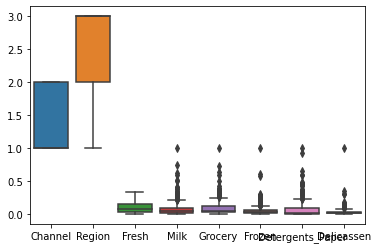

In [65]:
#이상치 확인
fig=plt.figure()
sns.boxplot(data=data1)

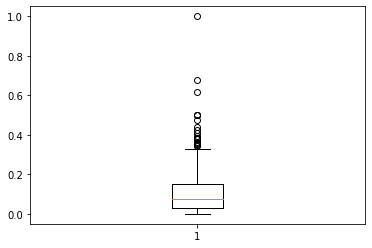

In [53]:
fresh=data_num['Fresh']
fresh_arr=fresh.to_numpy()
plt.boxplot(fresh)
plt.show()

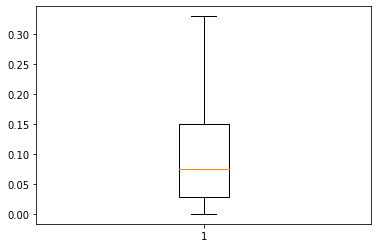

In [61]:
Q1 = np.percentile(fresh_arr,25)
Q3 = np.percentile(fresh_arr,75)
#max=np.percentile(fresh_arr,100)  # Q4
IQR = Q3 - Q1               

lower = Q1 - 1.5 * IQR      
upper = Q3 + 1.5 * IQR      
fresh_df=fresh.to_frame()
arr=[]
for i in range(len(fresh_df)):
  if float(fresh_df.loc[i,'Fresh'])>=upper:
    fresh_df.loc[i,'Fresh']=Q3
  arr.append(float(fresh_df.loc[i,'Fresh']))

fresh_arr2=np.array(arr)
data1['Fresh'] = fresh_arr2
plt.boxplot(fresh_arr2)
plt.show()

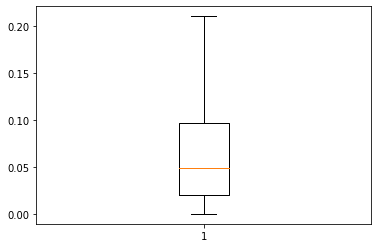

In [67]:
milk=data_num['Milk']
milk_arr=milk.to_numpy()

Q1 = np.percentile(milk_arr,25)
Q3 = np.percentile(milk_arr,75)
#max=np.percentile(fresh_arr,100)  # Q4
IQR = Q3 - Q1               

lower = Q1 - 1.5 * IQR      
upper = Q3 + 1.5 * IQR      
milk_df=milk.to_frame()
arr=[]
for i in range(len(milk_df)):
  if float(milk_df.loc[i,'Milk'])>=upper:
    milk_df.loc[i,'Milk']=Q3
  arr.append(float(milk_df.loc[i,'Milk']))

milk_arr2=np.array(arr)
data1['Milk'] = milk_arr2
plt.boxplot(milk_arr2)
plt.show()

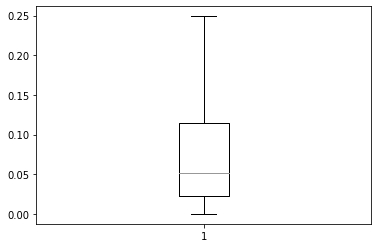

In [68]:
Grocery=data_num['Grocery']
Grocery_arr=Grocery.to_numpy()

Q1 = np.percentile(Grocery_arr,25)
Q3 = np.percentile(Grocery_arr,75)
#max=np.percentile(fresh_arr,100)  # Q4
IQR = Q3 - Q1               

lower = Q1 - 1.5 * IQR      
upper = Q3 + 1.5 * IQR      
Grocery_df=Grocery.to_frame()
arr=[]
for i in range(len(Grocery_df)):
  if float(Grocery_df.loc[i,'Grocery'])>=upper:
    Grocery_df.loc[i,'Grocery']=Q3
  arr.append(float(Grocery_df.loc[i,'Grocery']))

Grocery_arr2=np.array(arr)
data1['Grocery'] = Grocery_arr2
plt.boxplot(Grocery_arr2)
plt.show()

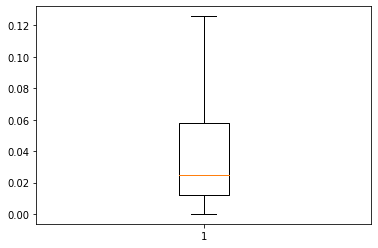

In [69]:
Frozen=data_num['Frozen']
Frozen_arr=Frozen.to_numpy()

Q1 = np.percentile(Frozen_arr,25)
Q3 = np.percentile(Frozen_arr,75)
#max=np.percentile(fresh_arr,100)  # Q4
IQR = Q3 - Q1               

lower = Q1 - 1.5 * IQR      
upper = Q3 + 1.5 * IQR      
Frozen_df=Frozen.to_frame()
arr=[]
for i in range(len(Frozen_df)):
  if float(Frozen_df.loc[i,'Frozen'])>=upper:
    Frozen_df.loc[i,'Frozen']=Q3
  arr.append(float(Frozen_df.loc[i,'Frozen']))

Frozen_arr2=np.array(arr)
data1['Frozen'] = Frozen_arr2
plt.boxplot(Frozen_arr2)
plt.show()

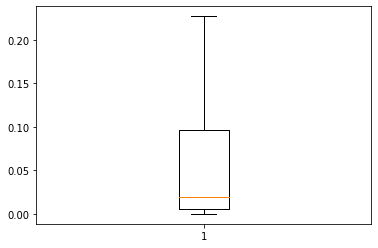

In [74]:
Deter=data_num['Detergents_Paper']
Deter_arr=Deter.to_numpy()

Q1 = np.percentile(Deter_arr,25)
Q3 = np.percentile(Deter_arr,75)
#max=np.percentile(fresh_arr,100)  # Q4
IQR = Q3 - Q1               

lower = Q1 - 1.5 * IQR      
upper = Q3 + 1.5 * IQR      
Deter_df=Deter.to_frame()
arr=[]
for i in range(len(Deter_df)):
  if float(Deter_df.loc[i,'Detergents_Paper'])>=upper:
    Deter_df.loc[i,'Detergents_Paper']=Q3
  arr.append(float(Deter_df.loc[i,'Detergents_Paper']))

Deter_arr2=np.array(arr)
data1['Detergents_Paper'] = Deter_arr2
plt.boxplot(Deter_arr2)
plt.show()

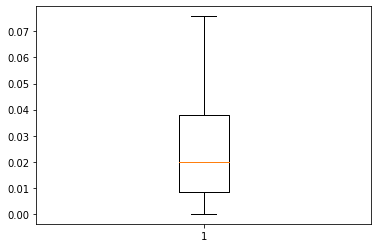

In [75]:
Delicassen=data_num['Delicassen']
Delicassen_arr=Delicassen.to_numpy()

Q1 = np.percentile(Delicassen_arr,25)
Q3 = np.percentile(Delicassen_arr,75)
#max=np.percentile(fresh_arr,100)  # Q4
IQR = Q3 - Q1               

lower = Q1 - 1.5 * IQR      
upper = Q3 + 1.5 * IQR      
Delicassen_df=Delicassen.to_frame()
arr=[]
for i in range(len(Delicassen_df)):
  if float(Delicassen_df.loc[i,'Delicassen'])>=upper:
    Delicassen_df.loc[i,'Delicassen']=Q3
  arr.append(float(Delicassen_df.loc[i,'Delicassen']))

Delicassen_arr2=np.array(arr)
data1['Delicassen'] = Delicassen_arr2
plt.boxplot(Delicassen_arr2)
plt.show()

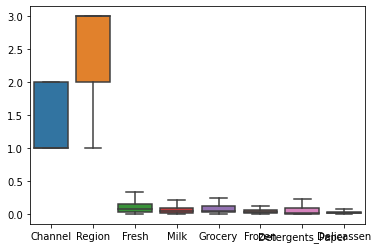

In [76]:
#이상치 처리 결과
fig=plt.figure()
sns.boxplot(data=data1)

PCA

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(data1)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2','principal component3','principal component4'])
principalDf.head()

,principal component1,principal component2,principal component3,principal component4
0,-0.496571,0.648484,0.040469,-0.041451
1,-0.496420,0.653024,-0.007394,-0.019207
2,-0.496281,0.650944,-0.013438,-0.037846
3,-0.436340,-0.355930,0.021481,-0.009382
4,-0.496434,0.639143,0.135603,-0.078055


In [78]:
print('성분별 분산량 : ',pca.explained_variance_ratio_)
print('누적 분산량: ', sum(pca.explained_variance_ratio_))

성분별 분산량 :  [0.7201517  0.26656816 0.00694372 0.00342076]
누적 분산량:  0.9970843420729306


-> 주성분이 3개가 될 때부터는 큰 차이가 없어서 주성분 2로 하겠음

In [79]:
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(data1)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])
principalDf.head()

,pc1,pc2
0,-0.496571,0.648484
1,-0.496420,0.653024
2,-0.496281,0.650944
3,-0.436340,-0.355930
4,-0.496434,0.639143


In [ ]:
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize = (8, 8))
# ax = fig.add_subplot(1, 1, 1)
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize=20)

# targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['target'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
#                , finalDf.loc[indicesToKeep, 'principal component2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

명목형 데이터 encoding

In [83]:
df=data1
df['Channel&Region']=0
for i in range(len(df)):
  if int(df.loc[i,'Channel'])==1 and int(df.loc[i,'Region'])==3:
    df.loc[i,'Channel&Region']=0
  elif int(df.loc[i,'Channel'])==2 and int(df.loc[i,'Region'])==1:
    df.loc[i,'Channel&Region']=1
  elif int(df.loc[i,'Channel'])==1 and int(df.loc[i,'Region'])==1:
    df.loc[i,'Channel&Region']=2
  elif int(df.loc[i,'Channel'])==2 and int(df.loc[i,'Region'])==3:
    df.loc[i,'Channel&Region']=3
  elif int(df.loc[i,'Channel'])==1 and int(df.loc[i,'Region'])==2:
    df.loc[i,'Channel&Region']=4
  elif int(df.loc[i,'Channel'])==2 and int(df.loc[i,'Region'])==2:
    df.loc[i,'Channel&Region']=5
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel&Region
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,3
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,3
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.037907,3
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.037907,3


**Finding K**

k: 2 inertia: 132.17705282263182
k: 3 inertia: 56.79594375490828
k: 4 inertia: 30.57083320192797
k: 5 inertia: 14.116272639065038
k: 6 inertia: 4.864197489049504
k: 7 inertia: 3.899560868912822
k: 8 inertia: 3.4407215898427372
k: 9 inertia: 3.184591040123939
k: 10 inertia: 2.939614461454585
k: 11 inertia: 2.730455730500012
k: 12 inertia: 2.5409695858585426
k: 13 inertia: 2.4483427749601336
k: 14 inertia: 2.321429474428977


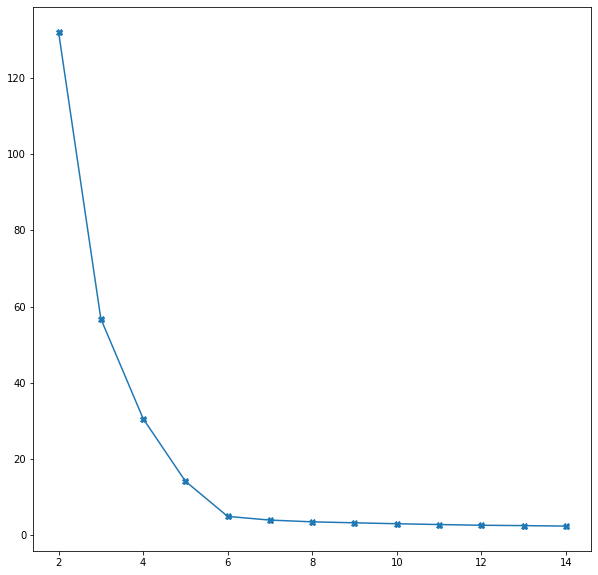

In [80]:
#Elbow Method
inertia = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k,init = 'k-means++', random_state=0)
    kmeans.fit(data1)
    inertia.append((k,kmeans.inertia_,))
    print('k:', k, 'inertia:', kmeans.inertia_)
    cluster_labels = kmeans.labels_
inertia_arr=np.array(inertia)

plt.figure(figsize=(10, 10))
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")

k: 2 score: 0.6397670079188884
k: 3 score: 0.7358557216077116
k: 4 score: 0.7787231049579956
k: 5 score: 0.829784929274149
k: 6 score: 0.8660583637332666
k: 7 score: 0.6369331501666029
k: 8 score: 0.5072654229556415
k: 9 score: 0.46956587507759856
k: 10 score: 0.3983014553541326
k: 11 score: 0.4061282197137336
k: 12 score: 0.39727762768731106
k: 13 score: 0.3750871921709359
k: 14 score: 0.36440511099490996


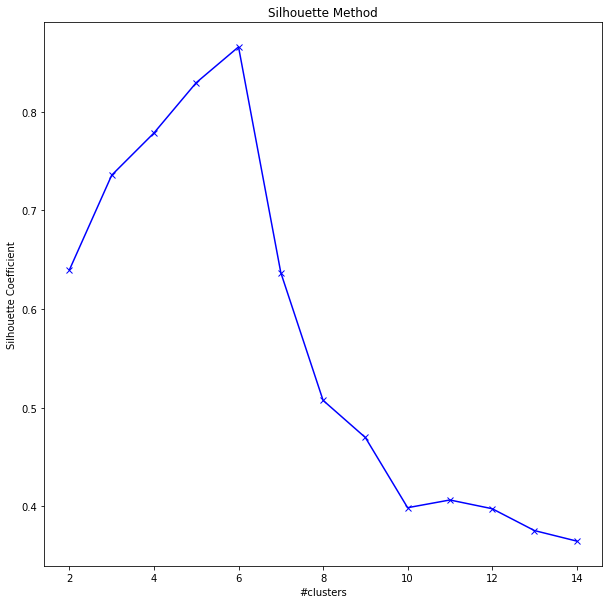

best n: 6 best score: 0.8660583637332666


In [81]:
#Silhouette
from sklearn.metrics import silhouette_score

sil=[]
best_n=-1
best_silhouette_score=-1
for k in range(2,15):
  kmeans=KMeans(n_clusters=k,init = 'k-means++', random_state=0)
  kmeans.fit(data1)
  inertia.append((k,kmeans.inertia_,))
  cluster_labels = kmeans.labels_

  score=silhouette_score(data1,cluster_labels)
  sil.append(score)
  #clusters=kmeans.predict(scaled_frame)
  #score=silhouette_score(scaled_frame, clusters)
  #cluster_labels = kmeans.labels_
  print('k:', k, 'score:', score)

  if score>best_silhouette_score:
    best_n=k
    best_silhouette_score=score

plt.figure(figsize=(10, 10))
plt.plot(range(2,15), sil, 'bx-')
plt.title('Silhouette Method')
plt.xlabel('#clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

print('best n:', best_n, 'best score:', best_silhouette_score)

-> 둘 다 6이 적절함

**Clustering**

In [ ]:
#data2=data1.drop(['label'], axis=1)

In [85]:
df=data1
df['Channel&Region']=0
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel&Region
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.037907,0
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.037907,0


In [87]:
for i in range(len(df)):
  if int(df.loc[i,'Channel'])==1 and int(df.loc[i,'Region'])==3:
    df.loc[i,'Channel&Region']=0
  elif int(df.loc[i,'Channel'])==2 and int(df.loc[i,'Region'])==1:
    df.loc[i,'Channel&Region']=1
  elif int(df.loc[i,'Channel'])==1 and int(df.loc[i,'Region'])==1:
    df.loc[i,'Channel&Region']=2
  elif int(df.loc[i,'Channel'])==2 and int(df.loc[i,'Region'])==3:
    df.loc[i,'Channel&Region']=3
  elif int(df.loc[i,'Channel'])==1 and int(df.loc[i,'Region'])==2:
    df.loc[i,'Channel&Region']=4
  elif int(df.loc[i,'Channel'])==2 and int(df.loc[i,'Region'])==2:
    df.loc[i,'Channel&Region']=5
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel&Region,label
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,3,2
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,3,2
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.037907,3,2
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0,0
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.037907,3,2


In [89]:
kmeans = KMeans(n_clusters=6, max_iter=1000, random_state=0)
#df=data1
cluster_label = kmeans.fit_predict(data1)
df['label'] = cluster_label
centers = kmeans.cluster_centers_
labels = kmeans.labels_
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel&Region,label
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,3,3
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,3,3
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.037907,3,3
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0,0
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.037907,3,3


In [90]:
df[df['label']==5].sort_values(by='Region')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel&Region,label
197,2,1,0.021614,0.095884,0.111967,0.018112,0.105600,0.030559,1,5
264,2,1,0.009541,0.131040,0.166442,0.000592,0.146409,0.026325,1,5
251,2,1,0.054669,0.097154,0.114821,0.110463,0.095997,0.037907,1,5
245,2,1,0.027276,0.083044,0.149962,0.003369,0.218744,0.058010,1,5
230,2,1,0.098700,0.080797,0.060489,0.058005,0.023320,0.044514,1,5
226,2,1,0.185282,0.079871,0.099260,0.028499,0.062831,0.032332,1,5
223,2,1,0.024851,0.033659,0.056717,0.091825,0.019229,0.028306,1,5
218,2,1,0.000134,0.101426,0.163855,0.020709,0.117431,0.037907,1,5
216,2,1,0.022551,0.097154,0.114821,0.002531,0.095997,0.013997,1,5
214,2,1,0.021035,0.088450,0.122455,0.014595,0.145846,0.016437,1,5


Channel&Region 조합 label을 encoding 한 것과 clustering으로 분류한 label의 차이가 있는지

In [111]:
#할때마다 달라짐
cnt=0
for j in range(len(df2)):
  if int(df2.loc[j,'Channel&Region'])!=int(df2.loc[i,'label']):
    cnt+=0
print('Channel&Region 조합과 Label이 일치하지 않는 row의 수 : ', cnt)

Channel&Region 조합과 Label이 일치하지 않는 row의 수 :  0


=> 일치하지 않는 row 없음

PCA

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [115]:
principalDf.head()

,principal component1,principal component2
0,2.160594,-0.237383
1,2.161873,-0.236602
2,2.161359,-0.236716
3,-2.138121,-0.020668
4,2.157850,-0.239262


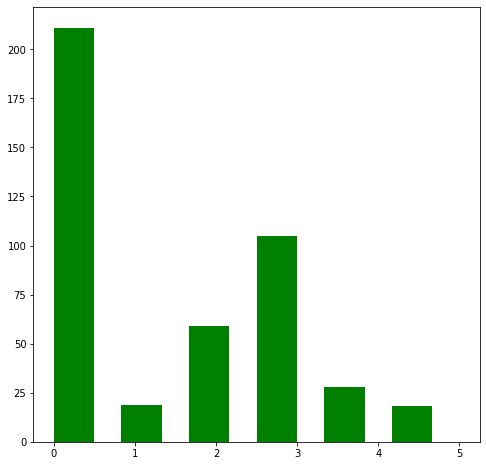

In [55]:
plt.figure(figsize=(8, 8))
plt.hist(labels, bins=6, width=0.5, color='g')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


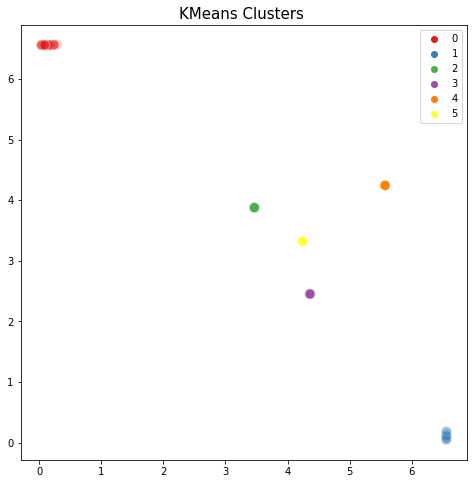

In [91]:
y_means = kmeans.fit(data1)
clusters=y_means.transform(data1)

plt.figure(figsize = (8,8))
sns.scatterplot(clusters[:,0], clusters[:,1], 
                hue=y_means.labels_, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters ', fontsize=15)
plt.legend()
plt.show()